# Real-world data representation using tensors

## Image Dogs

In [1]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [3]:
import imageio

img_arr = imageio.imread('../data/p1ch4/image-dog/bobby.jpg')
img_arr.shape

(720, 1280, 3)

In [4]:
img_arr

Array([[[ 77,  45,  22],
        [ 77,  45,  22],
        [ 78,  46,  21],
        ...,
        [118,  78,  52],
        [117,  77,  51],
        [116,  76,  51]],

       [[ 75,  43,  20],
        [ 76,  44,  21],
        [ 77,  45,  20],
        ...,
        [118,  78,  52],
        [117,  77,  51],
        [116,  76,  50]],

       [[ 74,  39,  17],
        [ 75,  41,  16],
        [ 77,  43,  18],
        ...,
        [119,  80,  51],
        [117,  77,  51],
        [116,  76,  50]],

       ...,

       [[215, 165,  78],
        [216, 166,  79],
        [217, 167,  80],
        ...,
        [172, 122,  51],
        [174, 124,  53],
        [174, 124,  53]],

       [[215, 165,  78],
        [216, 166,  79],
        [217, 167,  80],
        ...,
        [173, 123,  54],
        [174, 124,  55],
        [174, 124,  55]],

       [[215, 165,  78],
        [216, 166,  79],
        [217, 167,  80],
        ...,
        [159, 108,  42],
        [158, 107,  41],
        [158, 107,  41]]

In [5]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)

In [9]:
img.shape, out.shape

(torch.Size([720, 1280, 3]), torch.Size([3, 720, 1280]))

In [10]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)
batch

tensor([[[[0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0],
          ...,
          [0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0]],

         [[0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0],
          ...,
          [0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0]],

         [[0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0],
          ...,
          [0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0]]],


        [[[0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0],
          ...,
          [0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0]],

         [[0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0],
          ...,
          [0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0]],

         [[0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0],
          ...,
          [0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0]]],


        [[[0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0],
          ...,
          [0, 0,  ..., 0, 0],
          [0, 0,  ..., 0, 0]],

         [[0, 0,  ..., 0, 0],
       

In [11]:
import os

data_dir = '../data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3] # <1>
    batch[i] = img_t

In [12]:
batch = batch.float()
batch /= 255.0

In [13]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

## Volumetric CT

In [14]:
dir_path = "../data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%80/99 files (80.8%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 81/99  (81.899/99  (100.0%)


(99, 512, 512)

In [15]:
vol_arr

Array([[[ -985,  -990,  -999, ..., -1017, -1008,  -971],
        [-1016,  -984,  -963, ..., -1000, -1009,  -999],
        [-1024, -1008,  -996, ...,  -979, -1021,  -987],
        ...,
        [ -920,  -942,  -944, ...,  -893,  -917,  -955],
        [ -871,  -879,  -905, ...,  -895,  -869,  -867],
        [ -876,  -855,  -873, ...,  -933,  -982,  -936]],

       [[ -982,  -989, -1020, ...,  -988,  -977,  -980],
        [-1015,  -969,  -980, ...,  -981,  -974, -1016],
        [-1020,  -978,  -972, ...,  -988,  -993, -1015],
        ...,
        [ -880,  -854,  -924, ...,  -909,  -829,  -829],
        [ -907,  -868,  -928, ...,  -909,  -901,  -894],
        [ -885,  -850,  -899, ...,  -977,  -964,  -991]],

       [[-1022, -1011,  -983, ..., -1013,  -980,  -967],
        [-1022, -1005, -1012, ...,  -948,  -966, -1008],
        [ -991,  -965,  -993, ...,  -964, -1011,  -996],
        ...,
        [ -858,  -899,  -950, ...,  -939,  -868,  -827],
        [ -948,  -914,  -918, ...,  -968,  -9

In [16]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)

vol.shape

torch.Size([1, 99, 512, 512])

In [17]:
vol

tensor([[[[ -985.,  -990.,  ..., -1008.,  -971.],
          [-1016.,  -984.,  ..., -1009.,  -999.],
          ...,
          [ -871.,  -879.,  ...,  -869.,  -867.],
          [ -876.,  -855.,  ...,  -982.,  -936.]],

         [[ -982.,  -989.,  ...,  -977.,  -980.],
          [-1015.,  -969.,  ...,  -974., -1016.],
          ...,
          [ -907.,  -868.,  ...,  -901.,  -894.],
          [ -885.,  -850.,  ...,  -964.,  -991.]],

         ...,

         [[ -977.,  -999.,  ...,  -987.,  -847.],
          [ -980.,  -995.,  ...,  -915.,  -967.],
          ...,
          [ -912., -1001.,  ...,  -866.,  -881.],
          [ -998.,  -834.,  ...,  -852.,  -922.]],

         [[-1003., -1017.,  ...,  -984.,  -968.],
          [ -938., -1013.,  ...,  -999.,  -958.],
          ...,
          [ -886.,  -965.,  ...,  -895.,  -864.],
          [ -915.,  -865.,  ...,  -928.,  -856.]]]])

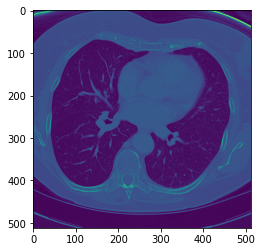

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[50])

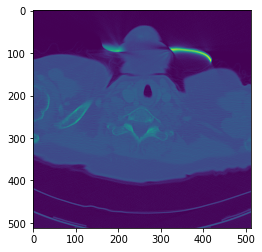

In [20]:
plt.imshow(vol_arr[3])

## tabular wine

In [21]:
import csv
wine_path = "../data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",
                         skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [22]:
wineq_numpy.shape

(4898, 12)

In [23]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))

wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [24]:
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [25]:
data = wineq[:, :-1] # <1>
data, data.shape

(tensor([[ 7.0000,  0.2700,  ...,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  ...,  0.4900,  9.5000],
         ...,
         [ 5.5000,  0.2900,  ...,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  ...,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [26]:
target = wineq[:, -1] # <2>
target, target.shape

(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]))

In [28]:
target_onehot = torch.zeros(target.shape[0], 10)

target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [29]:
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed

tensor([[6],
        [6],
        ...,
        [7],
        [6]])

In [30]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [31]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [33]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  ..., -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  ...,  1.3422e-03, -8.2419e-01],
        ...,
        [-1.6054e+00,  1.1666e-01,  ..., -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  ..., -1.4882e+00,  1.0448e+00]])

In [34]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)] # <1>
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


## Video

In [47]:
reader = imageio.get_reader('../data/p1ch4/video-cockatoo/cockatoo.mp4')
meta = reader.get_meta_data()
meta

{'plugin': 'ffmpeg',
 'nframes': inf,
 'ffmpeg_version': '4.2.2 built with Apple clang version 11.0.0 (clang-1100.0.33.8)',
 'codec': 'h264',
 'pix_fmt': 'yuv444p',
 'audio_codec': 'mp3',
 'fps': 20.0,
 'source_size': (1280, 720),
 'size': (1280, 720),
 'rotate': 0,
 'duration': 14.0}

In [48]:
n_channels = 3
n_frames = meta['nframes']
video = torch.empty(n_channels, 280, *meta['size'])

video.shape

torch.Size([3, 280, 1280, 720])